<a href="https://colab.research.google.com/github/Jose-Luis-Ortiz-Alvarez/Simulaciones-Sistemas-Dinamicos-y-Control/blob/main/Simulaciones/Simulacion_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalar librerías necesarias
!pip install control matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 7.4 MB/s eta 0:00:00


Laura Sofia Castaño Pineda - José Luis Ortiz Alvarez

PUNTO 1

--- G1 con u(t)=√2cos(5t) ---
G(j5) = (0.972972972972973-0.16216216216216217j)
Magnitude: 0.9864
Phase: -9.46°
Output: y(t) ≈ 1.3950 * cos(5t + -9.46°)

--- G2 con u(t)=√2cos(5t) ---
G(j5) = (-0.29608127721335264-0.34833091436865016j)
Magnitude: 0.4572
Phase: -130.36°
Output: y(t) ≈ 0.6465 * cos(5t + -130.36°)

--- G1 con u(t)=2cos(8t) ---
G(j8) = (0.9336099585062241-0.24896265560165975j)
Magnitude: 0.9662
Phase: -14.93°
Output: y(t) ≈ 1.9325 * cos(8t + -14.93°)

--- G2 con u(t)=2cos(8t) ---
G(j8) = (-0.16153846153846155-0.09230769230769231j)
Magnitude: 0.1861
Phase: -150.26°
Output: y(t) ≈ 0.3721 * cos(8t + -150.26°)



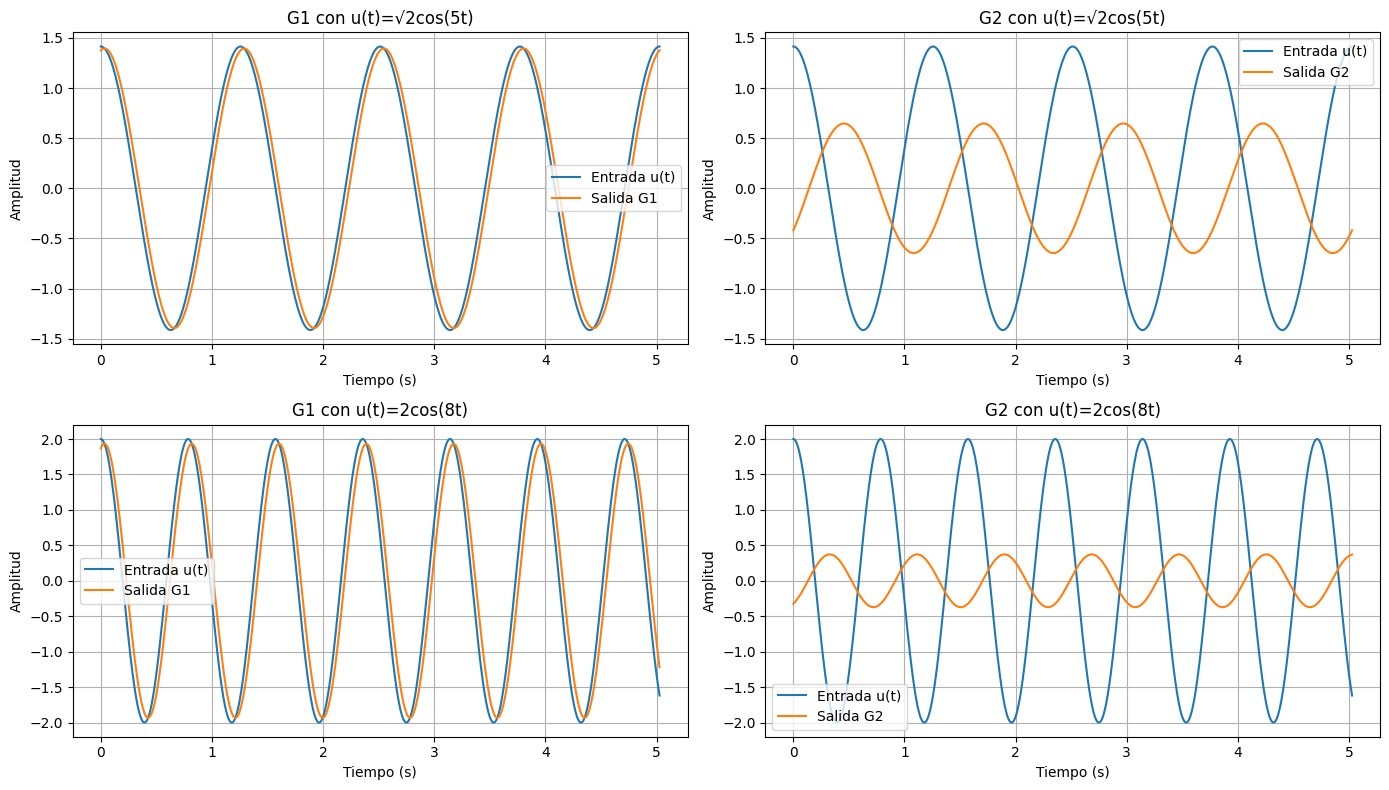

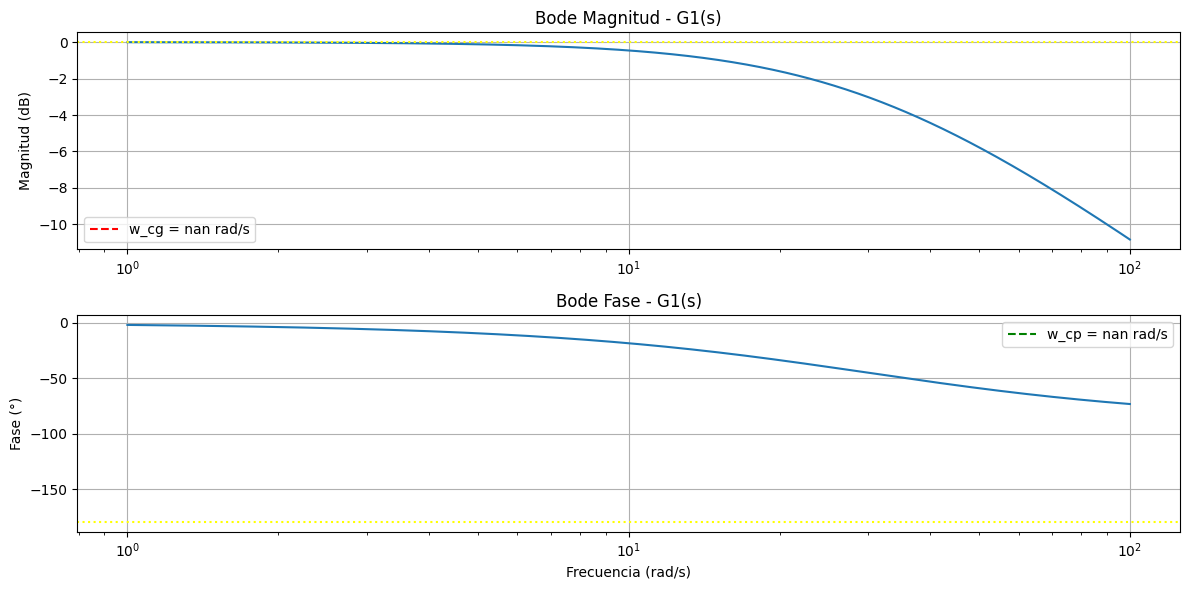

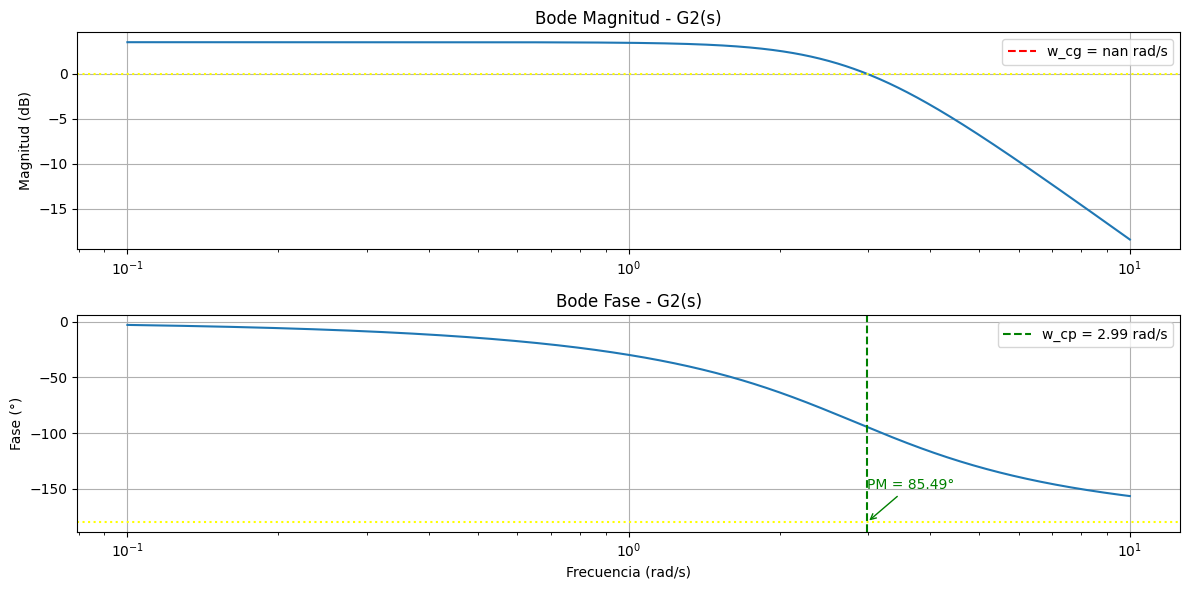

In [8]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Funciones de transferencia
G1 = ctrl.tf([30], [1, 30])
G2 = ctrl.tf([12], [1, 4, 8])

# Frecuencias de entrada
omega1 = 5  # para entrada sqrt(2)cos(5t)
omega2 = 8  # para entrada 2cos(8t)

# Evaluar G(jw) en omega1 y omega2
def evaluate_and_print(G, omega, u_amp, label):
    Gw = ctrl.evalfr(G, 1j * omega)
    mag = abs(Gw)
    phase = np.angle(Gw)
    y_amp = mag * u_amp
    phase_deg = np.degrees(phase)
    print(f"--- {label} ---")
    print(f"G(j{omega}) = {Gw}")
    print(f"Magnitude: {mag:.4f}")
    print(f"Phase: {phase_deg:.2f}°")
    print(f"Output: y(t) ≈ {y_amp:.4f} * cos({omega}t + {phase_deg:.2f}°)\n")

evaluate_and_print(G1, omega1, np.sqrt(2), "G1 con u(t)=√2cos(5t)")
evaluate_and_print(G2, omega1, np.sqrt(2), "G2 con u(t)=√2cos(5t)")
evaluate_and_print(G1, omega2, 2, "G1 con u(t)=2cos(8t)")
evaluate_and_print(G2, omega2, 2, "G2 con u(t)=2cos(8t)")

# Simulación en tiempo
t = np.linspace(0, 2 * np.pi / min(omega1, omega2) * 4, 1000)
u1 = np.sqrt(2) * np.cos(omega1 * t)
u2 = 2 * np.cos(omega2 * t)

# Salidas analíticas
G1_w1 = ctrl.evalfr(G1, 1j * omega1)
G2_w1 = ctrl.evalfr(G2, 1j * omega1)
G1_w2 = ctrl.evalfr(G1, 1j * omega2)
G2_w2 = ctrl.evalfr(G2, 1j * omega2)

y_G1_w1 = abs(G1_w1) * np.sqrt(2) * np.cos(omega1 * t + np.angle(G1_w1))
y_G2_w1 = abs(G2_w1) * np.sqrt(2) * np.cos(omega1 * t + np.angle(G2_w1))
y_G1_w2 = abs(G1_w2) * 2 * np.cos(omega2 * t + np.angle(G1_w2))
y_G2_w2 = abs(G2_w2) * 2 * np.cos(omega2 * t + np.angle(G2_w2))

# Gráficas de entradas y salidas (solo aquí se agregan etiquetas)
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(t, u1, label="Entrada u(t)")
plt.plot(t, y_G1_w1, label="Salida G1")
plt.title("G1 con u(t)=√2cos(5t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t, u1, label="Entrada u(t)")
plt.plot(t, y_G2_w1, label="Salida G2")
plt.title("G2 con u(t)=√2cos(5t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(t, u2, label="Entrada u(t)")
plt.plot(t, y_G1_w2, label="Salida G1")
plt.title("G1 con u(t)=2cos(8t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(t, u2, label="Entrada u(t)")
plt.plot(t, y_G2_w2, label="Salida G2")
plt.title("G2 con u(t)=2cos(8t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# === Diagrama de Bode con Márgenes ===
def bode_with_margins(G, nombre):
    mag, phase, omega = ctrl.bode(G, dB=True, plot=False)
    gm, pm, wcg, wcp = ctrl.margin(G)

    mag_db = 20 * np.log10(mag)
    phase_deg = np.degrees(phase)

    plt.figure(figsize=(12, 6))

    # Magnitud
    plt.subplot(2, 1, 1)
    plt.semilogx(omega, mag_db)
    if wcg:
        plt.axvline(wcg, color='r', linestyle='--', label=f'w_cg = {wcg:.2f} rad/s')
        plt.axhline(0, color='yellow', linestyle=':')
        plt.annotate(f"GM = {20*np.log10(gm):.2f} dB", xy=(wcg, 0), xytext=(wcg, 10),
                     arrowprops=dict(arrowstyle="->", color='red'), color='red')
    plt.title(f"Bode Magnitud - {nombre}")
    plt.ylabel("Magnitud (dB)")
    plt.grid(True)
    plt.legend()

    # Fase
    plt.subplot(2, 1, 2)
    plt.semilogx(omega, phase_deg)
    if wcp:
        plt.axvline(wcp, color='g', linestyle='--', label=f'w_cp = {wcp:.2f} rad/s')
        plt.axhline(-180, color='yellow', linestyle=':')
        plt.annotate(f"PM = {pm:.2f}°", xy=(wcp, -180), xytext=(wcp, -150),
                     arrowprops=dict(arrowstyle="->", color='green'), color='green')
    plt.title(f"Bode Fase - {nombre}")
    plt.xlabel("Frecuencia (rad/s)")
    plt.ylabel("Fase (°)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Mostrar diagramas de Bode con márgenes
bode_with_margins(G1, "G1(s)")
bode_with_margins(G2, "G2(s)")


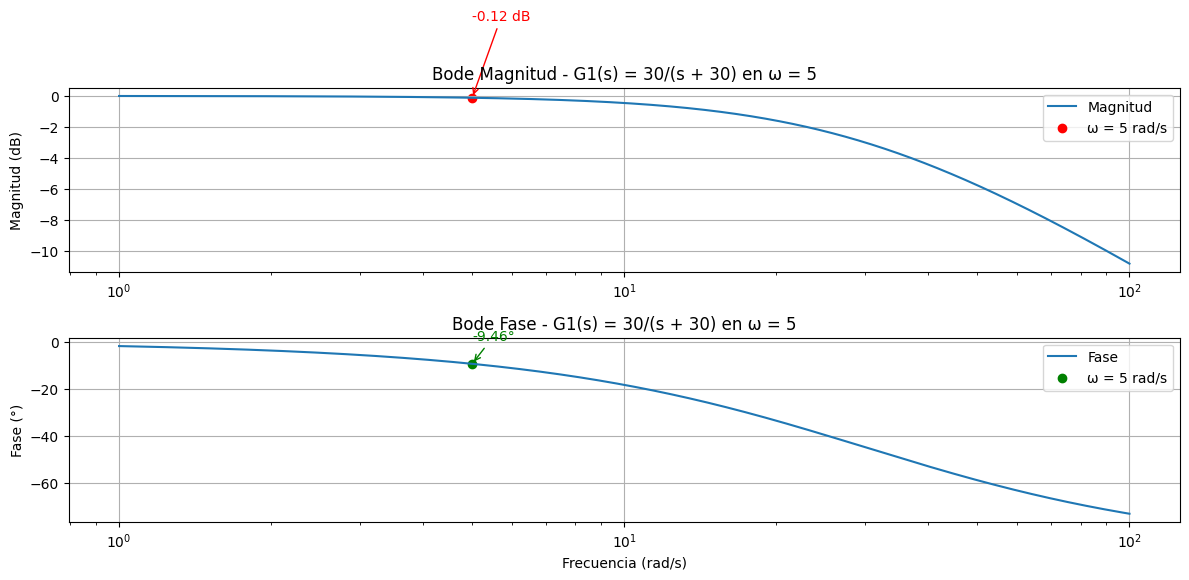

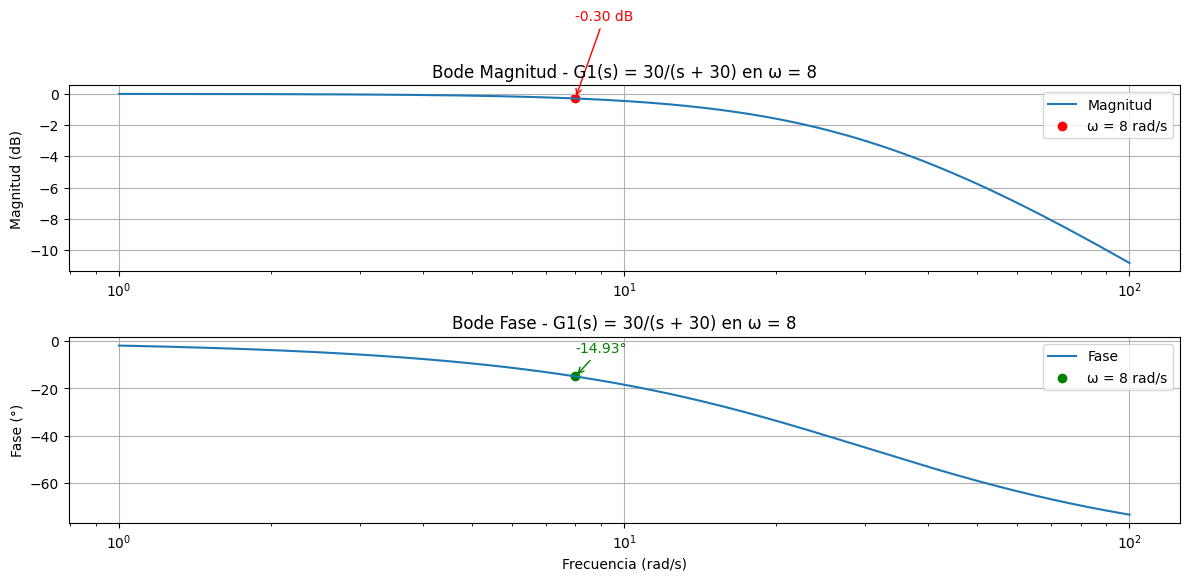

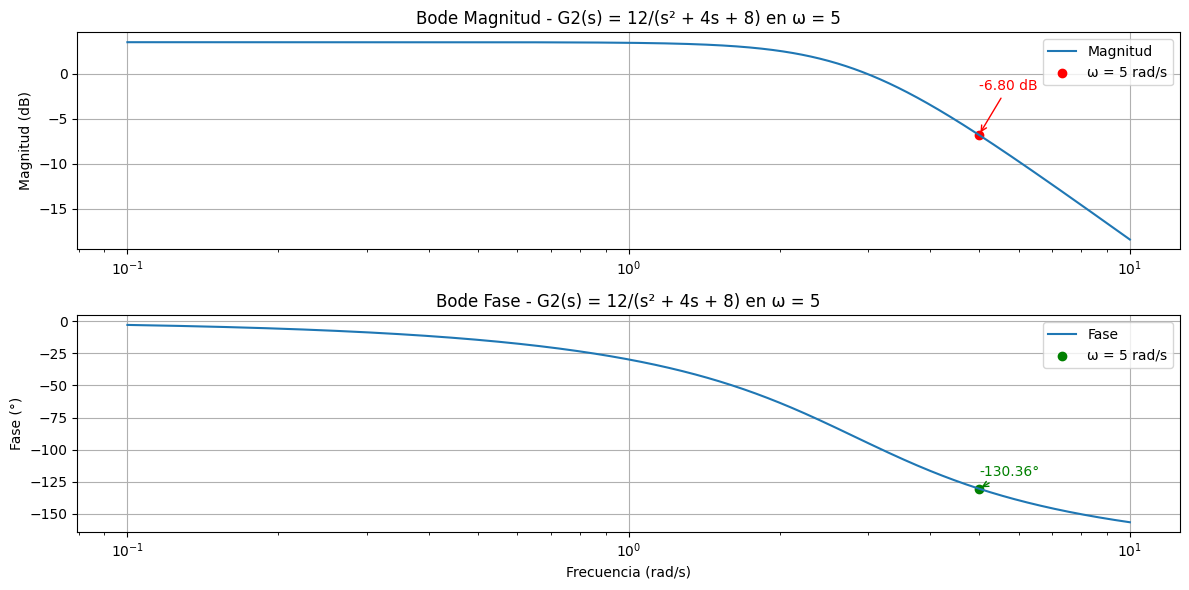

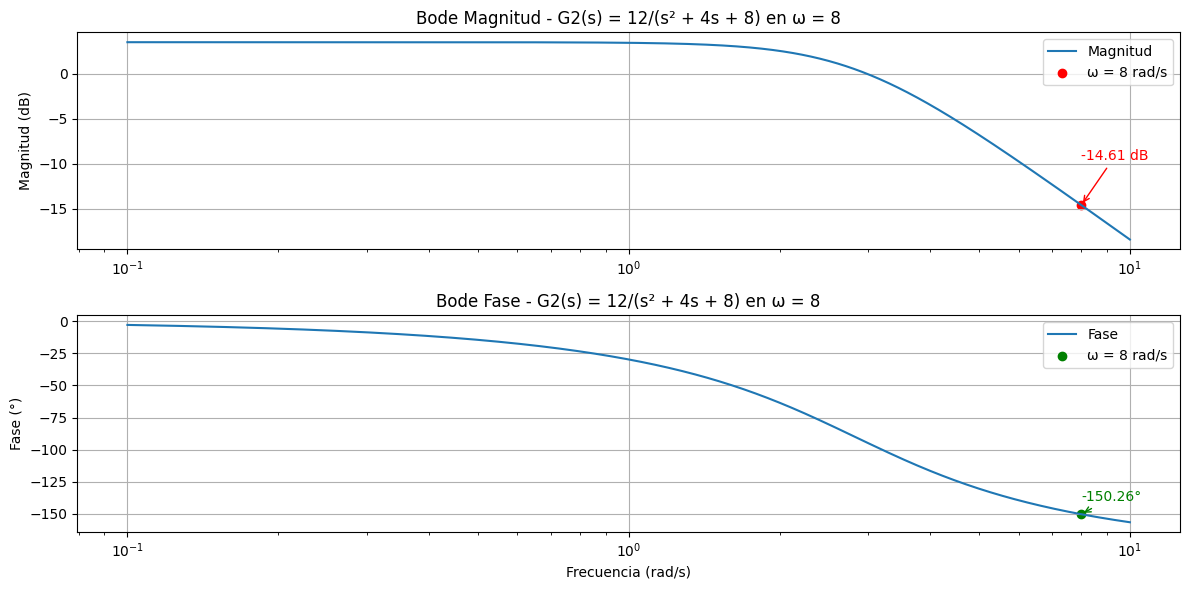

In [4]:
# Importar
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Función de transferencia
G1 = ctrl.tf([30], [1, 30])

# Función para graficar Bode con un solo punto marcado
def plot_bode_single_omega(G, nombre, omega_punto):
    # Obtener bode completo
    mag, phase, omega = ctrl.bode(G, dB=True, plot=False)
    mag_db = 20 * np.log10(mag)
    phase_deg = np.degrees(phase)

    # Evaluar G(jw)
    Gw = ctrl.evalfr(G, 1j * omega_punto)
    punto_mag = 20 * np.log10(abs(Gw))
    punto_phase = np.angle(Gw, deg=True)

    # Bode
    plt.figure(figsize=(12, 6))

    # Magnitud
    plt.subplot(2, 1, 1)
    plt.semilogx(omega, mag_db, label="Magnitud")
    plt.scatter([omega_punto], [punto_mag], color='red', label=f"ω = {omega_punto} rad/s")
    plt.annotate(f"{punto_mag:.2f} dB", xy=(omega_punto, punto_mag), xytext=(omega_punto, punto_mag+5),
                 arrowprops=dict(arrowstyle="->", color='red'), color='red')
    plt.title(f"Bode Magnitud - {nombre} en ω = {omega_punto}")
    plt.ylabel("Magnitud (dB)")
    plt.grid(True)
    plt.legend()

    # Fase
    plt.subplot(2, 1, 2)
    plt.semilogx(omega, phase_deg, label="Fase")
    plt.scatter([omega_punto], [punto_phase], color='green', label=f"ω = {omega_punto} rad/s")
    plt.annotate(f"{punto_phase:.2f}°", xy=(omega_punto, punto_phase), xytext=(omega_punto, punto_phase+10),
                 arrowprops=dict(arrowstyle="->", color='green'), color='green')
    plt.title(f"Bode Fase - {nombre} en ω = {omega_punto}")
    plt.xlabel("Frecuencia (rad/s)")
    plt.ylabel("Fase (°)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Mostrar Bode solo para ω = 5
plot_bode_single_omega(G1, "G1(s) = 30/(s + 30)", 5)

# Mostrar Bode solo para ω = 8
plot_bode_single_omega(G1, "G1(s) = 30/(s + 30)", 8)



# Función de transferencia G2
G2 = ctrl.tf([12], [1, 4, 8])

# Función para graficar Bode con un solo punto marcado
def plot_bode_single_omega(G, nombre, omega_punto):
    # Obtener bode completo
    mag, phase, omega = ctrl.bode(G, dB=True, plot=False)
    mag_db = 20 * np.log10(mag)
    phase_deg = np.degrees(phase)

    # Evaluar G(jw)
    Gw = ctrl.evalfr(G, 1j * omega_punto)
    punto_mag = 20 * np.log10(abs(Gw))
    punto_phase = np.angle(Gw, deg=True)

    # Bode
    plt.figure(figsize=(12, 6))

    # Magnitud
    plt.subplot(2, 1, 1)
    plt.semilogx(omega, mag_db, label="Magnitud")
    plt.scatter([omega_punto], [punto_mag], color='red', label=f"ω = {omega_punto} rad/s")
    plt.annotate(f"{punto_mag:.2f} dB", xy=(omega_punto, punto_mag), xytext=(omega_punto, punto_mag+5),
                 arrowprops=dict(arrowstyle="->", color='red'), color='red')
    plt.title(f"Bode Magnitud - {nombre} en ω = {omega_punto}")
    plt.ylabel("Magnitud (dB)")
    plt.grid(True)
    plt.legend()

    # Fase
    plt.subplot(2, 1, 2)
    plt.semilogx(omega, phase_deg, label="Fase")
    plt.scatter([omega_punto], [punto_phase], color='green', label=f"ω = {omega_punto} rad/s")
    plt.annotate(f"{punto_phase:.2f}°", xy=(omega_punto, punto_phase), xytext=(omega_punto, punto_phase+10),
                 arrowprops=dict(arrowstyle="->", color='green'), color='green')
    plt.title(f"Bode Fase - {nombre} en ω = {omega_punto}")
    plt.xlabel("Frecuencia (rad/s)")
    plt.ylabel("Fase (°)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Mostrar Bode solo para ω = 5
plot_bode_single_omega(G2, "G2(s) = 12/(s² + 4s + 8)", 5)

# Mostrar Bode solo para ω = 8
plot_bode_single_omega(G2, "G2(s) = 12/(s² + 4s + 8)", 8)



PUNTO 2


=== K = 10 ===
Margen de ganancia (GM): 17.15 dB
Margen de fase (PM): 66.80°
Frecuencia de cruce de fase (wcg): 3.46 rad/s
Frecuencia de cruce de ganancia (wcp): 0.81 rad/s


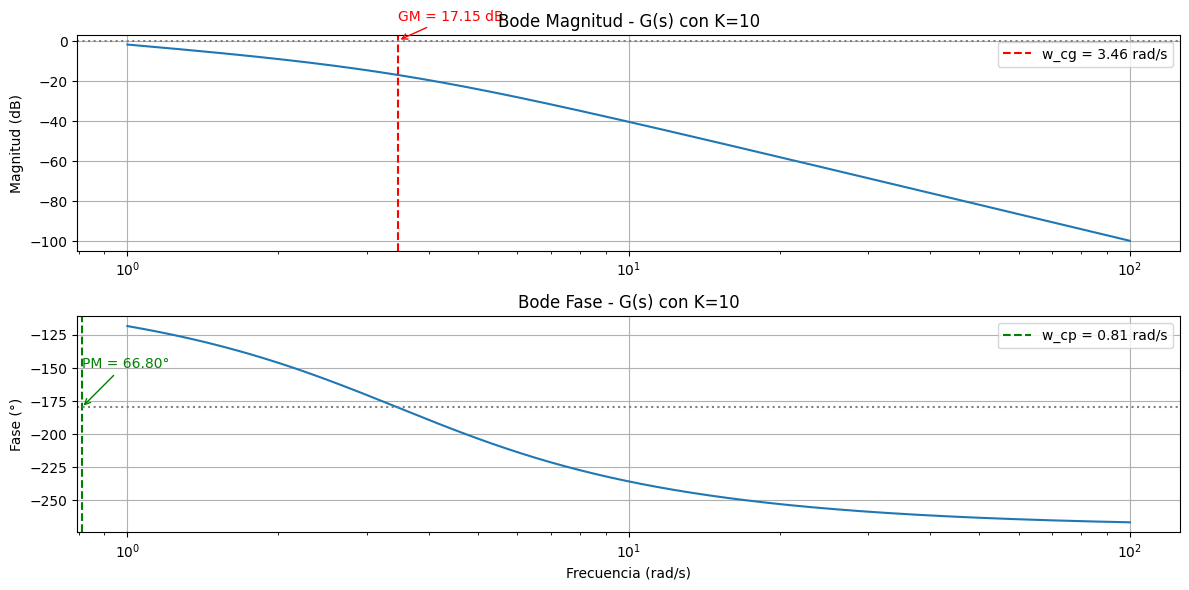


=== K = 80 ===
Margen de ganancia (GM): -0.92 dB
Margen de fase (PM): -3.42°
Frecuencia de cruce de fase (wcg): 3.46 rad/s
Frecuencia de cruce de ganancia (wcp): 3.65 rad/s


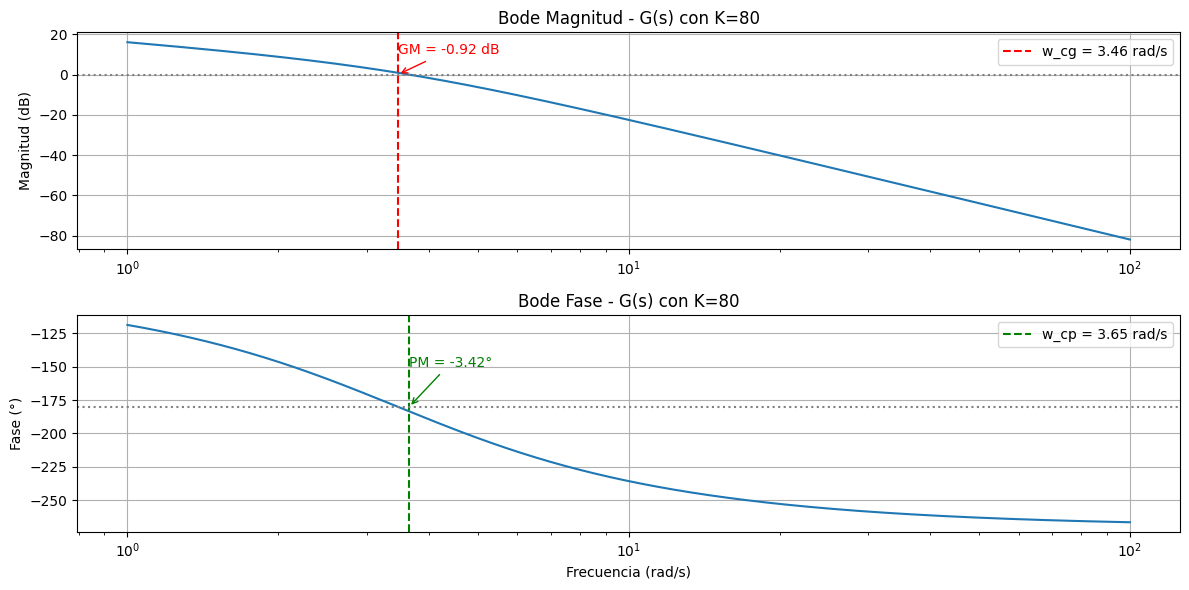

In [5]:
# Definir función de transferencia G(s) = K / (s^3 + 6s^2 + 12s)
def get_G_K(K):
    num = [K]
    den = [1, 6, 12, 0]  # s^3 + 6s^2 + 12s
    return ctrl.tf(num, den)

# Función para diagrama de Bode con márgenes
def bode_with_margins_K(G, K):
    mag, phase, omega = ctrl.bode(G, dB=True, plot=False)
    gm, pm, wcg, wcp = ctrl.margin(G)

    mag_db = 20 * np.log10(mag)
    phase_deg = np.degrees(phase)

    print(f"\n=== K = {K} ===")
    print(f"Margen de ganancia (GM): {20*np.log10(gm):.2f} dB")
    print(f"Margen de fase (PM): {pm:.2f}°")
    print(f"Frecuencia de cruce de fase (wcg): {wcg:.2f} rad/s")
    print(f"Frecuencia de cruce de ganancia (wcp): {wcp:.2f} rad/s")

    plt.figure(figsize=(12, 6))

    # Magnitud
    plt.subplot(2, 1, 1)
    plt.semilogx(omega, mag_db)
    if wcg:
        plt.axvline(wcg, color='r', linestyle='--', label=f'w_cg = {wcg:.2f} rad/s')
        plt.axhline(0, color='gray', linestyle=':')
        plt.annotate(f"GM = {20*np.log10(gm):.2f} dB", xy=(wcg, 0), xytext=(wcg, 10),
                     arrowprops=dict(arrowstyle="->", color='red'), color='red')
    plt.title(f"Bode Magnitud - G(s) con K={K}")
    plt.ylabel("Magnitud (dB)")
    plt.grid(True)
    plt.legend()

    # Fase
    plt.subplot(2, 1, 2)
    plt.semilogx(omega, phase_deg)
    if wcp:
        plt.axvline(wcp, color='g', linestyle='--', label=f'w_cp = {wcp:.2f} rad/s')
        plt.axhline(-180, color='gray', linestyle=':')
        plt.annotate(f"PM = {pm:.2f}°", xy=(wcp, -180), xytext=(wcp, -150),
                     arrowprops=dict(arrowstyle="->", color='green'), color='green')
    plt.title(f"Bode Fase - G(s) con K={K}")
    plt.xlabel("Frecuencia (rad/s)")
    plt.ylabel("Fase (°)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Ejecutar para K = 10
G_K10 = get_G_K(10)
bode_with_margins_K(G_K10, 10)

# Ejecutar para K = 80
G_K80 = get_G_K(80)
bode_with_margins_K(G_K80, 80)


PUNTO 3


=== Sistema de Tanques ===
Margen de ganancia (GM): inf dB
Margen de fase (PM): inf°
Frecuencia de cruce de fase (wcg): nan rad/s
Frecuencia de cruce de ganancia (wcp): nan rad/s


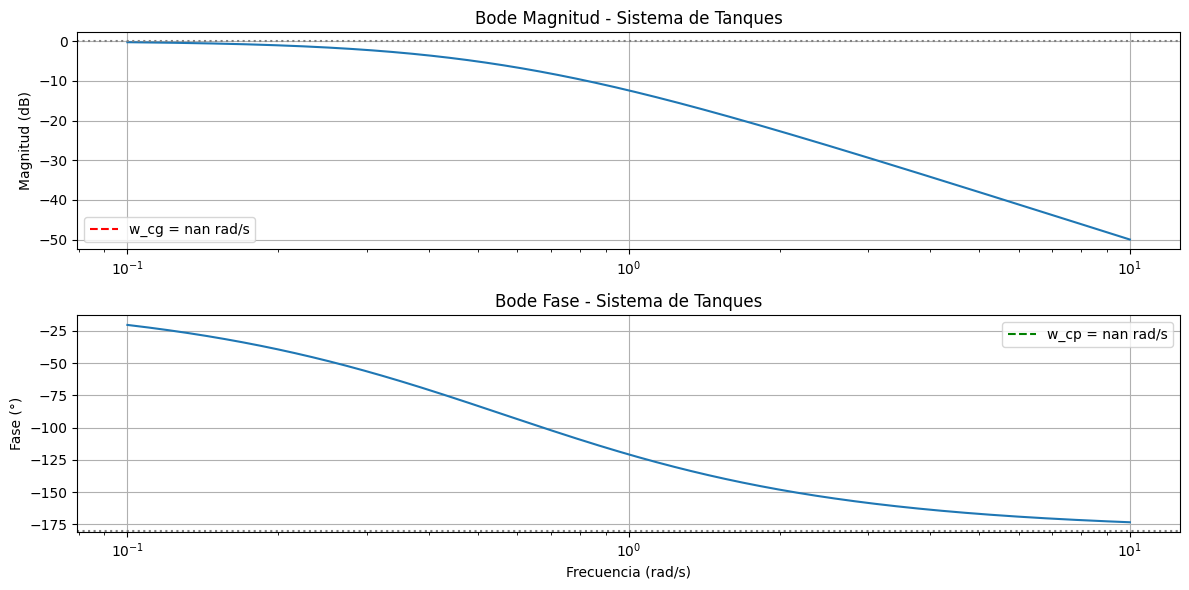

In [6]:
# Función de transferencia del sistema de tanques
G_tanques = ctrl.tf([0.3188], [1, 1.143, 0.3188])

# Cálculo de Bode y márgenes
mag, phase, omega = ctrl.bode(G_tanques, dB=True, plot=False)
gm, pm, wcg, wcp = ctrl.margin(G_tanques)

mag_db = 20 * np.log10(mag)
phase_deg = np.degrees(phase)

# Mostrar resultados numéricos
print("\n=== Sistema de Tanques ===")
print(f"Margen de ganancia (GM): {20*np.log10(gm):.2f} dB")
print(f"Margen de fase (PM): {pm:.2f}°")
print(f"Frecuencia de cruce de fase (wcg): {wcg:.2f} rad/s")
print(f"Frecuencia de cruce de ganancia (wcp): {wcp:.2f} rad/s")

# Gráfica del diagrama de Bode con márgenes
plt.figure(figsize=(12, 6))

# Magnitud
plt.subplot(2, 1, 1)
plt.semilogx(omega, mag_db)
if wcg:
    plt.axvline(wcg, color='r', linestyle='--', label=f'w_cg = {wcg:.2f} rad/s')
    plt.axhline(0, color='gray', linestyle=':')
    plt.annotate(f"GM = {20*np.log10(gm):.2f} dB", xy=(wcg, 0), xytext=(wcg, 10),
                 arrowprops=dict(arrowstyle="->", color='red'), color='red')
plt.title("Bode Magnitud - Sistema de Tanques")
plt.ylabel("Magnitud (dB)")
plt.grid(True)
plt.legend()

# Fase
plt.subplot(2, 1, 2)
plt.semilogx(omega, phase_deg)
if wcp:
    plt.axvline(wcp, color='g', linestyle='--', label=f'w_cp = {wcp:.2f} rad/s')
    plt.axhline(-180, color='gray', linestyle=':')
    plt.annotate(f"PM = {pm:.2f}°", xy=(wcp, -180), xytext=(wcp, -140),
                 arrowprops=dict(arrowstyle="->", color='green'), color='green')
plt.title("Bode Fase - Sistema de Tanques")
plt.xlabel("Frecuencia (rad/s)")
plt.ylabel("Fase (°)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
